<a href="https://colab.research.google.com/github/rajattiwari010/SVM_DenseNet/blob/MY-REPO's/Svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
%cd '/content/drive/MyDrive/Dataset/model Folder 1'

/content/drive/MyDrive/Dataset/model Folder 1


In [7]:
import tensorflow as tf

# Replace 'model' with the actual folder name where your saved model is located
model_path = '/content/drive/MyDrive/Dataset/model Folder 1'

# Load the TensorFlow SavedModel
loaded_model = tf.saved_model.load(model_path)

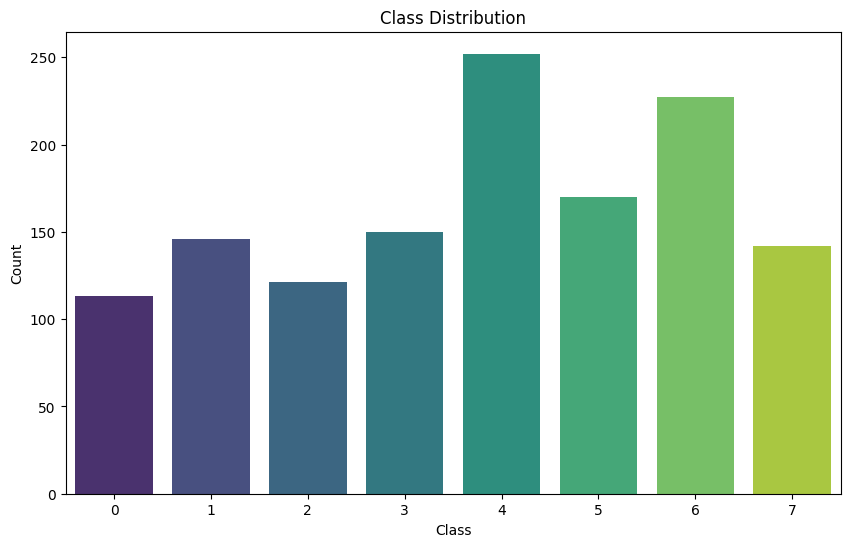

In [9]:

import tensorflow as tf
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
import os

# Define the paths to your dataset directories
benign_dir = r'/content/drive/MyDrive/Dataset/Untitled folder/New His dataset/Benign'
malignant_dir = r'/content/drive/MyDrive/Dataset/Untitled folder/New His dataset/Melignant'

image_size = (32, 32)

image_files = []
labels = []

# Load images and map subfolder names to class labels
class_mapping = {
    'adenosis': 0,
    'fibroadenoma': 1,
    'phyllodes_tumor': 2,
    'tubula_adenoma': 3,
    'ductal_carcinoma': 4,
    'lobular_carcinoma': 5,
    'mucinous_carcinoma': 6,
    'papillary_carcinoma': 7
}

# Load images from the benign subfolders
for class_name in class_mapping.keys():
    class_dir = os.path.join(benign_dir, class_name)
    if not os.path.exists(class_dir):
        continue  # Skip if the subfolder doesn't exist
    for filename in os.listdir(class_dir):
        if filename.endswith('.png'):
            image_path = os.path.join(class_dir, filename)
            image_files.append(image_path)
            labels.append(class_mapping[class_name])

# Load images from the malignant subfolders
for class_name in class_mapping.keys():
    class_dir = os.path.join(malignant_dir, class_name)
    if not os.path.exists(class_dir):
        continue  # Skip if the subfolder doesn't exist
    for filename in os.listdir(class_dir):
        if filename.endswith('.png'):
            image_path = os.path.join(class_dir, filename)
            image_files.append(image_path)
            labels.append(class_mapping[class_name])

# Split the data into a training (70%) and testing (30%) set
X_train, X_test, y_train, y_test = train_test_split(image_files, labels, test_size=0.3, random_state=42)


def preprocess_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_png(img, channels=3)
    img = tf.image.resize(img, (32, 32))  # Match the input shape of your model
    img = tf.keras.applications.densenet.preprocess_input(img)
    return img


# X_train_preprocessed = [preprocess_image(image_path) for image_path in X_train]
# X_test_preprocessed = [preprocess_image(image_path) for image_path in X_test]


# X_train_features = np.array([loaded_model(np.expand_dims(img, axis=0)) for img in X_train_preprocessed])
# X_test_features = np.array([loaded_model(np.expand_dims(img, axis=0)) for img in X_test_preprocessed])


# X_train_features = X_train_features.reshape(X_train_features.shape[0], -1)
# X_test_features = X_test_features.reshape(X_test_features.shape[0], -1)


# svm_classifier = svm.SVC(kernel='linear')  # You can experiment with different kernels
# svm_classifier.fit(X_train_features, y_train)


# y_pred = svm_classifier.predict(X_test_features)

# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)

# print(f"Accuracy: {accuracy}")
# print(report)

# visualising the class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=labels, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


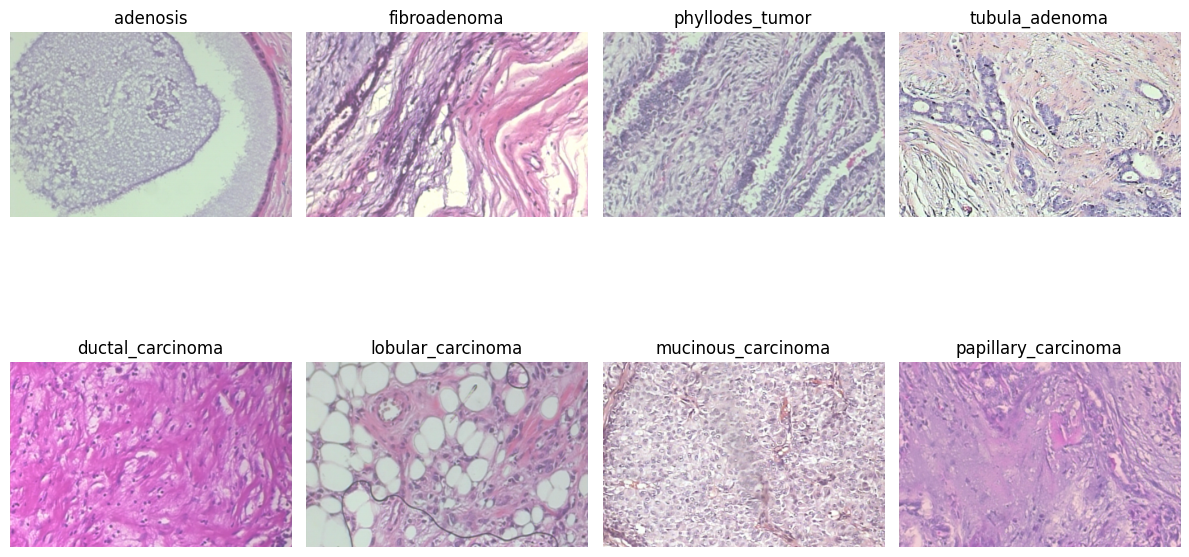

In [10]:
plt.figure(figsize=(12, 8))
for i in range(len(class_mapping)):
    plt.subplot(2, 4, i + 1)
    img_path = [img for img, label in zip(X_train, y_train) if label == i][0]  # Get the first image of each class
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.title(list(class_mapping.keys())[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [11]:

X_train_preprocessed = [preprocess_image(image_path) for image_path in X_train]
X_test_preprocessed = [preprocess_image(image_path) for image_path in X_test]


X_train_features = np.array([loaded_model(np.expand_dims(img, axis=0)) for img in X_train_preprocessed])
X_test_features = np.array([loaded_model(np.expand_dims(img, axis=0)) for img in X_test_preprocessed])


X_train_features = X_train_features.reshape(X_train_features.shape[0], -1)
X_test_features = X_test_features.reshape(X_test_features.shape[0], -1)


svm_classifier = svm.SVC(kernel='linear')  # You can experiment with different kernels
svm_classifier.fit(X_train_features, y_train)


y_pred = svm_classifier.predict(X_test_features)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)


Accuracy: 0.6523929471032746
              precision    recall  f1-score   support

           0       0.73      0.59      0.65        27
           1       0.49      0.79      0.61        39
           2       1.00      0.45      0.62        51
           3       0.71      0.74      0.72        46
           4       0.81      0.80      0.80        83
           5       0.82      0.55      0.66        51
           6       0.48      0.78      0.59        60
           7       0.50      0.35      0.41        40

    accuracy                           0.65       397
   macro avg       0.69      0.63      0.63       397
weighted avg       0.71      0.65      0.65       397



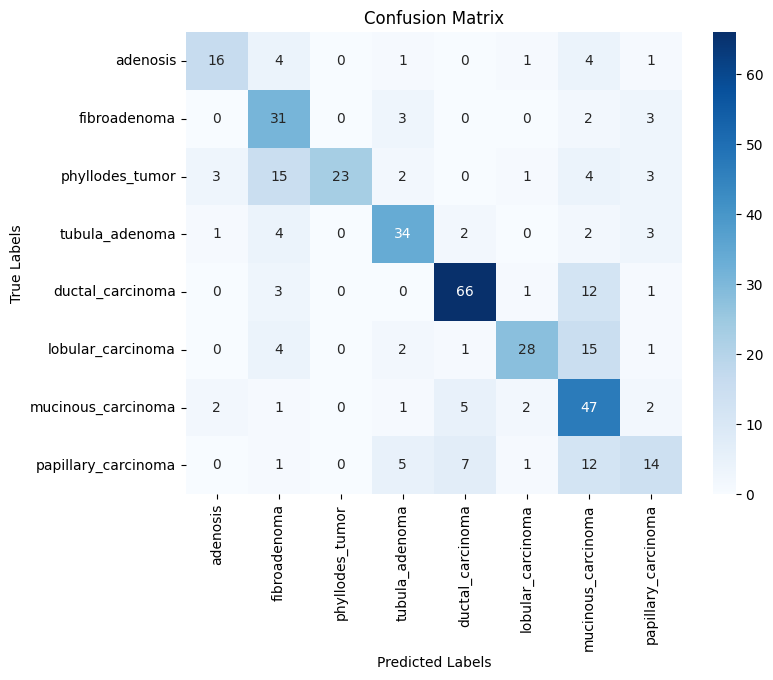

In [14]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_mapping.keys(), yticklabels=class_mapping.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
